# Newton Raphson solver in pure Python, plus some other introductory notes

First we need to import a few libraries that we will need. 

The first line is specific to using Python in the Jupyter environment. It defines how and where to put plots. 

The second two lines load the packages we will wish to use. They are comparable to Matlab toolboxes. In computational usage of Python, you almost **always** use these two, perhaps additional libraries as well. 

The last of the 4 lines is loading my code simply so we have a starting point. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp

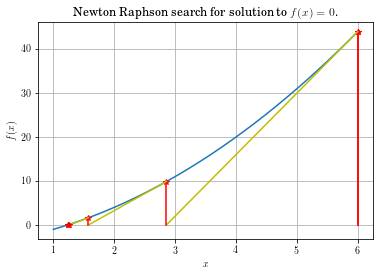

In [2]:
from newton_raphson import newton_raphson_plot
from newton_raphson import myfunc
function_name = 'myfunc'
newton_raphson_plot(function_name,6)
plt.savefig('Newton_Raphson_Solution.svg')  # There is now a file in Scaled Vector Format

If you really want to understand the Jupyter *magics* uncomment the next line. (remove the '#')

In [3]:
%magic

(1.2360679774997896, -7.81975583743945e-11)

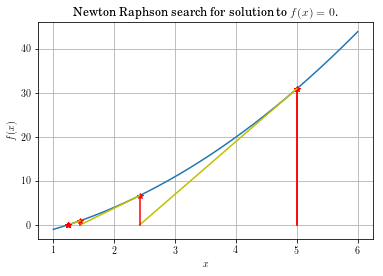

In [4]:
# The last line in a cell dumps all output to the page. Here we get the answer (1.236)!
newton_raphson_plot(function_name, x0=5)

Let's put the plots in a GUI. 

In [5]:
%matplotlib inline

(1.2360679775000651, -9.171621755329502e-07)

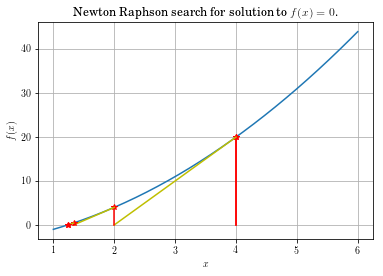

In [6]:
newton_raphson_plot(function_name, x0=4)
## For higher quality, uncomment below. 
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'svg')

So, how is this done? Let's start by defining a *function*, or *subroutine*, etc.

In [7]:
def myfunc(x):
#    print('I love Python')
    return x**2+2*x-4

In [8]:
myfunc(3)

11

In [9]:
a = myfunc(4)
print(a)

20


The word *def* takes the place of *function* in Matlab. The colon, ":", ends the line. All other lines are indented a single level. [Standard](https://www.python.org/dev/peps/pep-0008/) formating defined this as 4 spaces. 

* Most editors will move to four spaces is you use the *Tab* key. 
* [Standard](https://www.python.org/dev/peps/pep-0008/) for formatting are considered a big deal. 
    * You won't remember them.
    * A good editor (Spyder, PyCharm, Atom) will remember them.
    * They substantially enhance readability.
    * Many editors will make this happen for you automatically on save. 

In [10]:
function_name = 'myfunc'

Plots are done similarly to Matlab. 
* We optioned here, for our sanity, to control the *name space*
* The name *ylabel* **can still be used as a variable**!

In [11]:
ylabel = 4
ylabel

4

In [12]:
help(sp.linspace)

Help on function linspace in module numpy.core.function_base:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    Parameters
    ----------
    start : scalar
        The starting value of the sequence.
    stop : scalar
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    retstep : bo

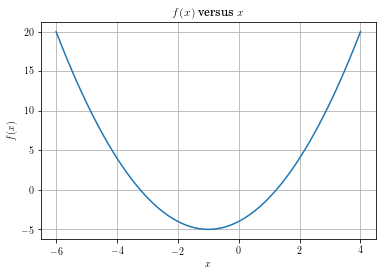

In [13]:
%matplotlib inline
x = sp.linspace(start = -6, stop= 4, num = 200)
#x = sp.linspace(start=-6, stop=10,num=200)
plt.plot(x,myfunc(x))

plt.grid('on')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('$f(x)$ versus $x$')
plt.show()
# To save a plot
plt.savefig('myplot.pdf')

In [14]:
def newton_raphson(function, x0 = 0, dx = 1e-10, eps = 1e-10, count = 0):
    deltax = 2*eps
    x = x0
    # loop until it converges, but no more than 50 times
    while abs(deltax) > eps and count < 50: 
        count += 1 # I can add 1 to the variable *count*. Neat Python shortcut. 
        # This is a comment
        # The next line is "Matlab style" and *bad*
        #f = eval(function + '('+ str(x) + ')')
        f = globals()[function](x)  #We explain later. 
        #f2 = eval(function + '('+ str(x+dx) + ')')
        f2 = globals()[function](x+dx)
        # Calculate the slope (estimation of derivative. )
        dfdx = (f2-f)/dx
        # Straight line approximation of delta x to intercept y=0. 
        deltax = -f/dfdx
        # New estimate of x. 
        x = x + deltax
    return x, deltax, count                

In [15]:
newton_raphson(function_name, x0=2)

(1.2360679774997898, -2.7585905568420595e-13, 5)

In [16]:
(x_soln, final_delta_x, num_steps) = newton_raphson(function_name, x0=2)

In [17]:
print(x_soln)
print(final_delta_x)
print(num_steps)

1.2360679774997898
-2.7585905568420595e-13
5


Outputs and unpacking of results

In [18]:
a = newton_raphson(function_name, x0=2)
a

(1.2360679774997898, -2.7585905568420595e-13, 5)

In [19]:
a[0]

1.2360679774997898

In [20]:
a1,a2,a3=a
a1

1.2360679774997898

In [21]:
%%timeit #just clocking this
newton_raphson(function_name, x0=2)

The slowest run took 10.77 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.73 µs per loop


In [22]:
# less efficient- using the eval statement
def newton_raphson_eval(function, x0 = 0, dx = 1e-10, eps = 1e-10):
    deltax = 2*eps
    count = 0
    x = x0
    while abs(deltax) > eps and count < 50:
        count += 1
        f = eval(function + '('+ str(x) + ')')
        #f = globals()[function](x)
        f2 = eval(function + '('+ str(x+dx) + ')')
        #f2 = globals()[function](x+dx)
        dfdx = (f2-f)/dx
        deltax = -f/dfdx
        x = x + deltax
    return x, deltax

In [23]:
%%timeit
newton_raphson_eval(function_name, x0=2)

The slowest run took 5.79 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 149 µs per loop


In [24]:
import scipy.optimize

In [25]:
%%timeit
scipy.optimize.broyden1(globals()[function_name], 2, f_tol=1e-14)

100 loops, best of 3: 1.95 ms per loop


In [26]:
%%timeit
scipy.optimize.broyden2(globals()[function_name], 2, f_tol=1e-14)

1000 loops, best of 3: 1.84 ms per loop


In [27]:
%%timeit
scipy.optimize.root(globals()[function_name], 2)

10000 loops, best of 3: 77.7 µs per loop


In [28]:
%%timeit
scipy.optimize.fsolve(globals()[function_name], 2)

10000 loops, best of 3: 76.2 µs per loop


My code is faster. How? Well, the other codes are optimized for very large problems. Mine is optimized for small problems. 

[Formatted printing](https://mkaz.tech/code/python-string-format.html) can be performed using the *.format* operator. 

In [29]:
print(sp.pi)
print('{:.2f}'.format(sp.pi))
print('{:.4f}'.format(sp.pi))
print('{:^12.2f}'.format(sp.pi))

3.141592653589793
3.14
3.1416
    3.14    


In [30]:
from ipywidgets import interact# , interactive, fixed, interact_manual
#import ipywidgets as widgets

In [31]:
def sdof_resp(x0=1,v0=0.1,m=1,c=.1,k=10,tmax=10):
    t = sp.linspace(0,tmax,200)
    omega = sp.sqrt(k/m)
    zeta = c/2/sp.sqrt(m*k)
    if zeta < 0:
        omega_d = omega*sp.sqrt(1-zeta**2)
        X0 = sp.sqrt(x0**2*omega**2+v0**2+2*x0*v0*zeta*omega)/omega_d
        Phi0 = sp.arctan2(x0*omega_d,(v0+zeta*omega*x0))
        x = X0*sp.exp(-zeta*omega*t)*sp.sin(omega_d*t+Phi0)
    else:
        C1 = (x0*omega * (zeta + sp.sqrt(zeta**2-1))+v0)/2/omega/sp.sqrt(zeta**2-1)
        C2 = (-x0*omega * (zeta - sp.sqrt(zeta**2-1))-v0)/2/omega/sp.sqrt(zeta**2-1)
        x = C1*sp.exp((-zeta+sp.sqrt(zeta**2-1))*omega*t) + C2*sp.exp((-zeta-sp.sqrt(zeta**2-1))*omega*t)
    plt.plot(t,x)
    plt.xlabel('$t$ (sec)')
    plt.ylabel('$x(t)$ (m)')
    plt.title('x versus time. $\\zeta = ${:.2f}'.format(zeta))
    

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


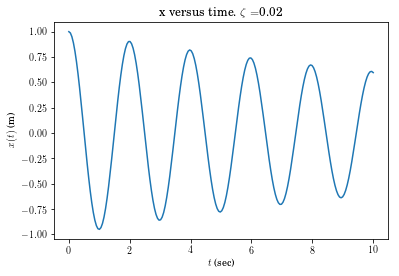

In [32]:
sdof_resp(1,0,1,.1,10,10)

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


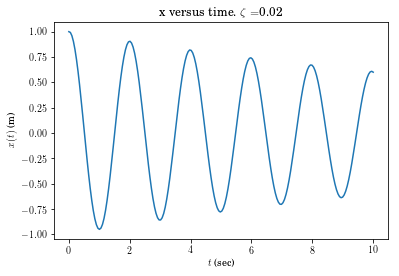

In [33]:
sdof_resp() # arguments aren't necessary to use the defaults. 

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


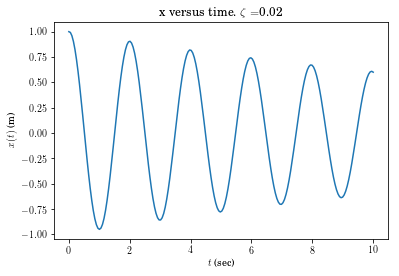

In [34]:
interact(sdof_resp, x0 = (0,2,0.1), v0 = (0,2,.1), m = (0,2,0.1), k = (0,100,1), c = (-1,5,.1));

In [35]:
globals()['a']

(1.2360679774997898, -2.7585905568420595e-13, 5)

In [36]:
mydict = {'ham':'$2','bacon':'$3'}

In [37]:
mydict['ham']

'$2'

In [38]:
help('modules')


Please wait a moment while I gather a list of all available modules...



/Users/jslater/Library/Python/3.5/lib/python/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/pkgutil.py:86: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html
  __import__(name)
/Users/jslater/Library/Python/3.5/lib/python/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
/Users/jslater/Library/Python/3.5/lib/python/site-packages/qtawesome/iconic_font.py:268: UserWarning: Y

/Users/jslater/Library/Python/3.5/lib/python/site-packages/zmq/backend/cffi/__pycache__/_cffi_ext.c:212:10: fatal error: 'zmq.h' file not found
#include <zmq.h>
         ^
1 error generated.


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The matplotlib.delaunay module was deprecated in version 1.4. Use matplotlib.tri.Triangulation instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


AppKit              cffi                markdown            rst2xetex
Cocoa               cgi                 markupsafe          rst2xml
CommonMark          cgitb               marshal             rstpep2html
CoreFoundation      change-svn-wc-format math                runpy
Cython              chardet             matlab_kernel       sched
Foundation          chunk               matplotlib          scipy
IN                  click               matplotlib2tikz     scratchpad
IPython             clint               mav                 seaborn
OpenSSL             clipboard           mavsense            select
PIL                 clonevirtualenv     mccabe              selectors
PyInstaller         cmath               metakernel          setproctitle
PyQt4               cmd                 mimetypes           setupegg
PyQt5               code                mistune             setuptools
__future__          codecs              mmap                sh
_ast                codeop             

In [39]:
dir(scipy.optimize)

['LbfgsInvHessProduct',
 'OptimizeResult',
 'OptimizeWarning',
 'Tester',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_basinhopping',
 '_cobyla',
 '_differentialevolution',
 '_group_columns',
 '_hungarian',
 '_lbfgsb',
 '_linprog',
 '_lsq',
 '_minimize',
 '_minpack',
 '_nnls',
 '_numdiff',
 '_root',
 '_slsqp',
 '_spectral',
 '_trustregion',
 '_trustregion_dogleg',
 '_trustregion_ncg',
 '_zeros',
 'absolute_import',
 'anderson',
 'approx_fprime',
 'basinhopping',
 'bench',
 'bisect',
 'bracket',
 'brent',
 'brenth',
 'brentq',
 'broyden1',
 'broyden2',
 'brute',
 'check_grad',
 'cobyla',
 'curve_fit',
 'diagbroyden',
 'differential_evolution',
 'division',
 'excitingmixing',
 'fixed_point',
 'fmin',
 'fmin_bfgs',
 'fmin_cg',
 'fmin_cobyla',
 'fmin_l_bfgs_b',
 'fmin_ncg',
 'fmin_powell',
 'fmin_slsqp',
 'fmin_tnc',
 'fminbound',
 'fsolve',
 'golden',
 'lbfgsb',
 'least_squares',
 'leastsq',
 

In [40]:
help(scipy.optimize.root)

Help on function root in module scipy.optimize._root:

root(fun, x0, args=(), method='hybr', jac=None, tol=None, callback=None, options=None)
    Find a root of a vector function.
    
    Parameters
    ----------
    fun : callable
        A vector function to find a root of.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its Jacobian.
    method : str, optional
        Type of solver.  Should be one of
    
            - 'hybr'             :ref:`(see here) <optimize.root-hybr>`
            - 'lm'               :ref:`(see here) <optimize.root-lm>`
            - 'broyden1'         :ref:`(see here) <optimize.root-broyden1>`
            - 'broyden2'         :ref:`(see here) <optimize.root-broyden2>`
            - 'anderson'         :ref:`(see here) <optimize.root-anderson>`
            - 'linearmixing'     :ref:`(see here) <optimize.root-linearmixing>`
            - 'diagbroyden'      :ref:`(see here) <opti

In [41]:
import scipy.io as spio
help(spio.matlab)

Help on package scipy.io.matlab in scipy.io:

NAME
    scipy.io.matlab - Utilities for dealing with MATLAB(R) files

DESCRIPTION
    Notes
    -----
    MATLAB(R) is a registered trademark of The MathWorks, Inc., 3 Apple Hill
    Drive, Natick, MA 01760-2098, USA.

PACKAGE CONTENTS
    byteordercodes
    mio
    mio4
    mio5
    mio5_params
    mio5_utils
    mio_utils
    miobase
    setup
    streams

FUNCTIONS
    loadmat(file_name, mdict=None, appendmat=True, **kwargs)
        Load MATLAB file.
        
        Parameters
        ----------
        file_name : str
           Name of the mat file (do not need .mat extension if
           appendmat==True). Can also pass open file-like object.
        mdict : dict, optional
            Dictionary in which to insert matfile variables.
        appendmat : bool, optional
           True to append the .mat extension to the end of the given
           filename, if not already present.
        byte_order : str or None, optional
           

In [42]:
help(spio)

Help on package scipy.io in scipy:

NAME
    scipy.io

DESCRIPTION
    Input and output (:mod:`scipy.io`)
    
    .. currentmodule:: scipy.io
    
    SciPy has many modules, classes, and functions available to read data
    from and write data to a variety of file formats.
    
    .. seealso:: :ref:`numpy-reference.routines.io` (in Numpy)
    
    MATLAB® files
    
    .. autosummary::
       :toctree: generated/
    
       loadmat - Read a MATLAB style mat file (version 4 through 7.1)
       savemat - Write a MATLAB style mat file (version 4 through 7.1)
       whosmat - List contents of a MATLAB style mat file (version 4 through 7.1)
    
    IDL® files
    
    .. autosummary::
       :toctree: generated/
    
       readsav - Read an IDL 'save' file
    
    Matrix Market files
    
    .. autosummary::
       :toctree: generated/
    
       mminfo - Query matrix info from Matrix Market formatted file
       mmread - Read matrix from Matrix Market formatted file
       mmwrit

In [43]:
import pandas as pd

In [44]:
help(pd.read_excel)

Help on function read_excel in module pandas.io.excel:

read_excel(io, sheetname=0, header=0, skiprows=None, skip_footer=0, index_col=None, names=None, parse_cols=None, parse_dates=False, date_parser=None, na_values=None, thousands=None, convert_float=True, has_index_names=None, converters=None, engine=None, squeeze=False, **kwds)
    Read an Excel table into a pandas DataFrame
    
    Parameters
    ----------
    io : string, file-like object, pandas ExcelFile, or xlrd workbook.
        The string could be a URL. Valid URL schemes include http, ftp, s3,
        and file. For file URLs, a host is expected. For instance, a local
        file could be file://localhost/path/to/workbook.xlsx
    sheetname : string, int, mixed list of strings/ints, or None, default 0
    
        Strings are used for sheet names, Integers are used in zero-indexed
        sheet positions.
    
        Lists of strings/integers are used to request multiple sheets.
    
        Specify None to get all sheets

In [45]:
df = pd.read_excel('Financial_Sample.xlsx')

In [46]:
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014
5,Government,Germany,Carretera,None,1513.0,3,350,529550.0,0.00,529550.00,393380.0,136170.00,2014-12-01,12,December,2014
6,Midmarket,Germany,Montana,None,921.0,5,15,13815.0,0.00,13815.00,9210.0,4605.00,2014-03-01,3,March,2014
7,Channel Partners,Canada,Montana,None,2518.0,5,12,30216.0,0.00,30216.00,7554.0,22662.00,2014-06-01,6,June,2014
8,Government,France,Montana,None,1899.0,5,20,37980.0,0.00,37980.00,18990.0,18990.00,2014-06-01,6,June,2014
9,Channel Partners,Germany,Montana,None,1545.0,5,12,18540.0,0.00,18540.00,4635.0,13905.00,2014-06-01,6,June,2014


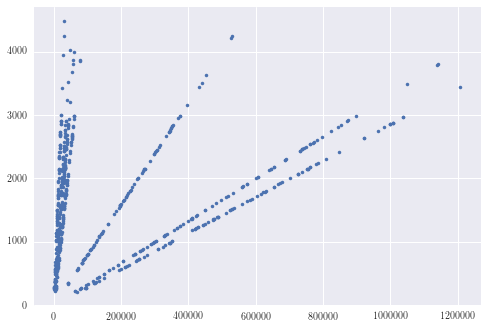

In [47]:
plt.plot(df['Gross Sales'],df['Units Sold'],'.')

In [48]:
df[['Gross Sales','Units Sold']].iloc[[0,2],[0,1]]

,Gross Sales,Units Sold
0,32370.0,1618.5
2,32670.0,2178.0


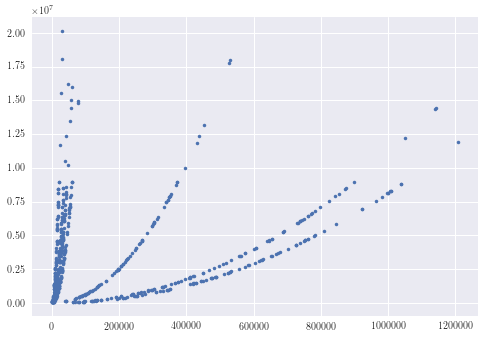

In [49]:
plt.plot(df['Gross Sales'],df['Units Sold']**2,'.')